# Homework 1
Mya Schroder

Due: 2/8/2024

### PROBLEM 1

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
import math
import matplotlib.pyplot as plt
from MML.regression import LinearMSE, LogisticBinaryCrossEntropy

Final Training RMSE: 37.31738274969648
Test RMSE: 49.79710185308974


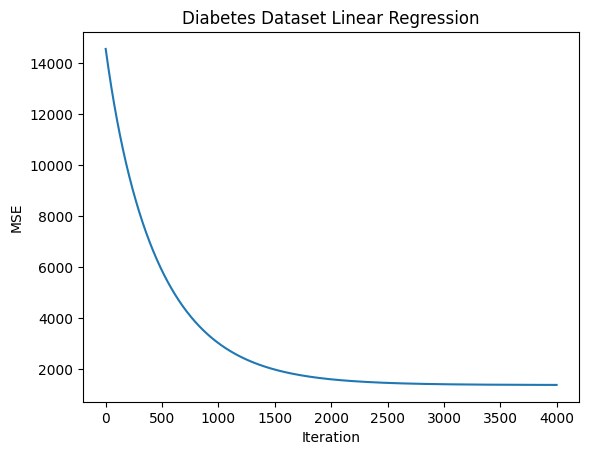

In [8]:
# Load Dataset
diabetes = datasets.load_diabetes()

# Split Dataset
train_x, test_x, train_y, test_y = train_test_split(diabetes.data,diabetes.target, test_size=0.2)
    # Original format of data x data [[x0, x1, x2, ... x9], [x0, x1, x2, ... x9]]
    # Original Format of data y data [...]

# Format train data
train_data = np.hstack((train_x, train_y.reshape(-1, 1)))
test_data = np.hstack((test_x, test_y.reshape(-1, 1)))

# Run Regression
mse_list, weights = LinearMSE.train(train_data, 0.001, 4000)
print("Final Training RMSE:", math.sqrt(mse_list[-1]))

mse, _ = LinearMSE.calculate_error_and_gradients(test_data, weights)
print("Test RMSE:", math.sqrt(mse))


plt.plot(mse_list)
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.title('Diabetes Dataset Linear Regression')
plt.show()

### PROBLEM 3

In [9]:
# With skewed data

# Load data
bc = datasets.load_breast_cancer()
X = bc.data
y = bc.target

X_train = np.vstack((X[y == 1], X[y == 0][:1]))
y_train = np.hstack((y[y == 1], y[y == 0][:1]))
X_test = np.vstack((X[y == 1], X[y == 0][:10]))
y_test = np.hstack((y[y == 1], y[y == 0][:10]))

print("Number of benign (1) training samples:", np.sum(y_train == 1))
print("Number of malignant (0) training samples:", np.sum(y_train == 0))
print("Number of benign (1) testing samples:", np.sum(y_test == 1))
print("Number of malignant (0) testing samples:", np.sum(y_test == 0))

# Format train data
train_data = np.hstack((X_train, y_train.reshape(-1, 1)))
test_data = np.hstack((X_test, y_test.reshape(-1, 1)))

_, weights = LogisticBinaryCrossEntropy.train(train_data, 0.001, 500)
accuracy = LogisticBinaryCrossEntropy.calculate_accuracy(train_data, weights)

print(f'\nFinal Training Accuracy: {accuracy:.6f}')

accuracy = LogisticBinaryCrossEntropy.calculate_accuracy(test_data, weights)
print(f'Test Accuracy: {accuracy:.6f}')



Number of benign (1) training samples: 357
Number of malignant (0) training samples: 1
Number of benign (1) testing samples: 357
Number of malignant (0) testing samples: 10

Final Training Accuracy: 1.000000
Test Accuracy: 0.986376


In [10]:
# Without skewed Data

# Load data
bc = datasets.load_breast_cancer()


X_train, X_test, y_train, y_test = train_test_split(bc.data, bc.target, test_size=0.2)

print("Number of benign (1) training samples:", np.sum(y_train == 1))
print("Number of malignant (0) training samples:", np.sum(y_train == 0))
print("Number of benign (1) testing samples:", np.sum(y_test == 1))
print("Number of malignant (0) testing samples:", np.sum(y_test == 0))

# Format train data
train_data = np.hstack((X_train, y_train.reshape(-1, 1)))
test_data = np.hstack((X_test, y_test.reshape(-1, 1)))


_, weights = LogisticBinaryCrossEntropy.train(train_data, 0.001, 500)
accuracy = LogisticBinaryCrossEntropy.calculate_accuracy(train_data, weights)

print(f'\nFinal Training Accuracy: {accuracy:.6f}')

accuracy = LogisticBinaryCrossEntropy.calculate_accuracy(test_data, weights)
print(f'Test Accuracy: {accuracy:.6f}')

Number of benign (1) training samples: 286
Number of malignant (0) training samples: 169
Number of benign (1) testing samples: 71
Number of malignant (0) testing samples: 43

Final Training Accuracy: 0.951648
Test Accuracy: 0.973684
